In [1]:
#impoer the liberies
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from bdshare import get_basic_hist_data
plt.style .use('fivethirtyeight')

In [2]:
ticker='SONALILIFE'#'AL-HAJTEX'
df=get_basic_hist_data('2019-01-01','2022-07-20',ticker,index='date')
df

,open,high,low,close,volume
date,,,,,
2021-06-30,11.0,11.0,11.0,11.0,1101
2021-07-05,12.1,12.1,12.1,12.1,1518
2021-07-06,13.3,13.3,13.3,13.3,1110
2021-07-07,14.6,14.6,14.6,14.6,20688
2021-07-08,16.0,16.0,16.0,16.0,907
...,...,...,...,...,...
2022-07-14,53.5,54.0,53.3,53.5,18389
2022-07-17,53.2,53.6,52.9,53.0,46884
2022-07-18,53.2,53.9,52.0,52.0,66294


In [3]:
m=pd.to_datetime(df.index)
m

DatetimeIndex(['2021-06-30', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-18',
               ...
               '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-12',
               '2022-07-13', '2022-07-14', '2022-07-17', '2022-07-18',
               '2022-07-19', '2022-07-20'],
              dtype='datetime64[ns]', name='date', length=253, freq=None)

In [4]:
df.set_index(m, inplace=True)
t=df.asfreq('D')
t

,open,high,low,close,volume
date,,,,,
2021-06-30,11.0,11.0,11.0,11.0,1101.0
2021-07-01,NaN,NaN,NaN,NaN,NaN
2021-07-02,NaN,NaN,NaN,NaN,NaN
2021-07-03,NaN,NaN,NaN,NaN,NaN
2021-07-04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-07-16,NaN,NaN,NaN,NaN,NaN
2022-07-17,53.2,53.6,52.9,53.0,46884.0
2022-07-18,53.2,53.9,52.0,52.0,66294.0


In [5]:
t=t.interpolate(method='time')
t

,open,high,low,close,volume
date,,,,,
2021-06-30,11.00,11.000000,11.000000,11.000000,1101.000000
2021-07-01,11.22,11.220000,11.220000,11.220000,1184.400000
2021-07-02,11.44,11.440000,11.440000,11.440000,1267.800000
2021-07-03,11.66,11.660000,11.660000,11.660000,1351.200000
2021-07-04,11.88,11.880000,11.880000,11.880000,1434.600000
...,...,...,...,...,...
2022-07-16,53.30,53.733333,53.033333,53.166667,37385.666667
2022-07-17,53.20,53.600000,52.900000,53.000000,46884.000000
2022-07-18,53.20,53.900000,52.000000,52.000000,66294.000000


In [6]:
stl=STL(t['close'])
Result = stl.fit()

In [7]:
seasonal,trend,resid = Result.seasonal,Result.trend, Result.resid
t['trend']=trend
t

,open,high,low,close,volume,trend
date,,,,,,
2021-06-30,11.00,11.000000,11.000000,11.000000,1101.000000,5.499240
2021-07-01,11.22,11.220000,11.220000,11.220000,1184.400000,7.607837
2021-07-02,11.44,11.440000,11.440000,11.440000,1267.800000,9.979907
2021-07-03,11.66,11.660000,11.660000,11.660000,1351.200000,12.630556
2021-07-04,11.88,11.880000,11.880000,11.880000,1434.600000,15.549882
...,...,...,...,...,...,...
2022-07-16,53.30,53.733333,53.033333,53.166667,37385.666667,52.824363
2022-07-17,53.20,53.600000,52.900000,53.000000,46884.000000,52.433658
2022-07-18,53.20,53.900000,52.000000,52.000000,66294.000000,52.037895


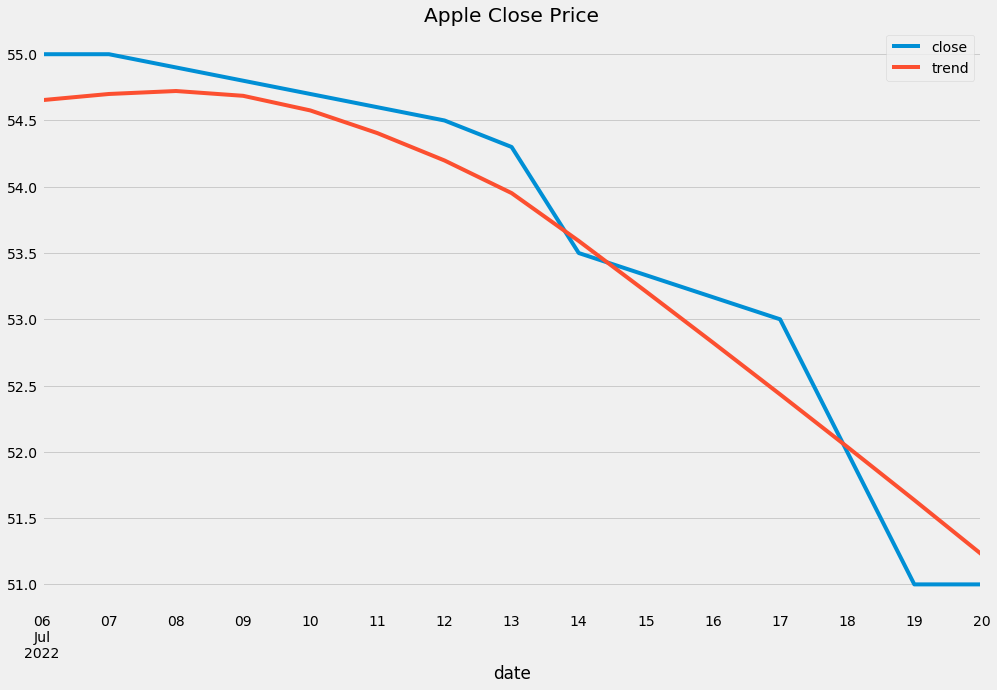

In [8]:
t[['close','trend']][-15:].plot(figsize=(15,10))
plt.title('Apple Close Price')
plt.legend()
plt.show()

In [9]:
def get_signal(data):
    buy_signal = []
    sell_signal = []
    last_buy_price=0
    last_sell_price=0
    back_to_back_buy=0
    back_to_back_sell=0
    Stock_in_hold=0
    for i in range(len(data['close'])):
        if data['close'][i]>data['trend'][i] and Stock_in_hold>0 and back_to_back_sell==0 and data['close'][i]>last_buy_price*1.04: #then you should Sell
            buy_signal.append(np.nan)
            sell_signal.append(data['close'][i])
            last_sell_price=data['close'][i]
            Stock_in_hold=Stock_in_hold-0.1
            back_to_back_sell=back_to_back_sell+1
            back_to_back_buy=0
            
        elif data['close'][i]>data['trend'][i] and Stock_in_hold>0 and back_to_back_sell>0 and data['close'][i]>last_sell_price*1.04: #then you should Sell
            buy_signal.append(np.nan)
            sell_signal.append(data['close'][i])
            last_sell_price=data['close'][i]
            Stock_in_hold=Stock_in_hold-0.1
            back_to_back_sell=back_to_back_sell+1
            back_to_back_buy=0
            
            
        elif data['close'][i]<data['trend'][i]*0.99 and Stock_in_hold<1 and back_to_back_buy==0:#Then you should buy
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
            last_buy_price=data['close'][i]
            Stock_in_hold=Stock_in_hold+0.1
            back_to_back_buy=back_to_back_buy+1
            back_to_back_sell=0
            
        elif 0<back_to_back_buy<4 and data['close'][i]<last_buy_price*(0.99-back_to_back_buy*0.04 ) and Stock_in_hold<1:
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
            last_buy_price=data['close'][i]
            Stock_in_hold=Stock_in_hold+0.1
            back_to_back_buy=back_to_back_buy+1
            back_to_back_sell=0
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
    return(buy_signal,sell_signal)

t['Buy']=get_signal(t)[0]
t['Sell']=get_signal(t)[1]

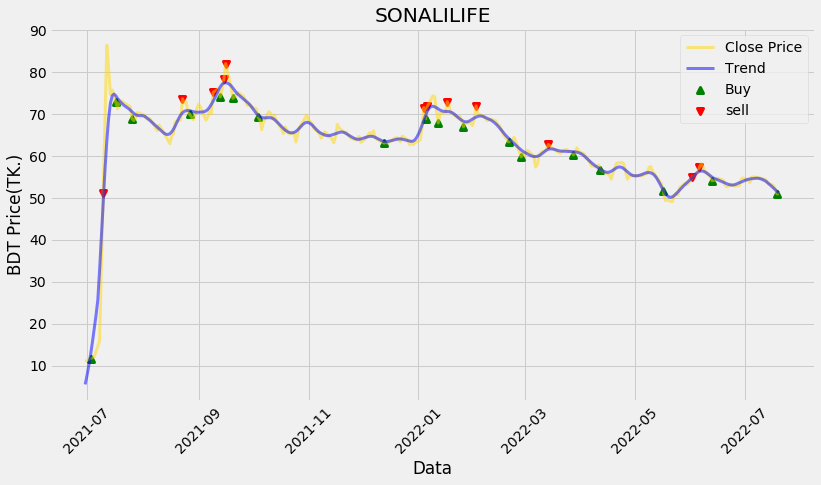

In [10]:
t1=t#[50:150]
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)
x_axis=np.array(t1.index)
ax.plot(x_axis,np.array(t1['close']),color='gold',lw=3,label='Close Price',alpha=0.5)#lw=line width
ax.plot(x_axis,np.array(t1['trend']),color='blue',lw=3,label='Trend',alpha=0.5)#lw=line width
ax.scatter(x_axis,np.array(t1['Buy']),color='Green',lw=3,label='Buy',marker='^',alpha=1)
ax.scatter(x_axis,np.array(t1['Sell']),color='red',lw=3,label='sell',marker='v',alpha=1)
ax.set_title(ticker)
ax.set_xlabel('Data')
ax.set_ylabel('BDT Price(TK.)')
plt.xticks(rotation=45)
ax.legend()
plt.show()